In [2]:
# import libraries required and load data
import pandas as pd
import numpy as np
import seaborn as sns


# loading the data to python using the path

df_content = pd.read_csv(r"C:\Users\Prakruthi\OneDrive\Desktop\Python\jio_data_analytics_project\raw_data\content.csv", index_col="Unnamed: 0")
df_consumption = pd.read_csv(r"C:\Users\Prakruthi\OneDrive\Desktop\Python\jio_data_analytics_project\raw_data\content_consumption.csv", index_col="Unnamed: 0")
df_subscribers = pd.read_csv(r"C:\Users\Prakruthi\OneDrive\Desktop\Python\jio_data_analytics_project\raw_data\subscribers.csv", index_col="Unnamed: 0")

In [30]:
# analyse the data
df_subscribers.head()


,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaN,NaN,NaN
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaN,NaN,NaN
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaN,NaN,NaN
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaN,NaN,NaN
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaN,NaN,NaN


In [31]:
df_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44620 entries, 0 to 44619
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                44620 non-null  object
 1   age_group              44620 non-null  object
 2   city_tier              44620 non-null  object
 3   subscription_date      44620 non-null  object
 4   subscription_plan      44620 non-null  object
 5   last_active_date       6652 non-null   object
 6   plan_change_date       7090 non-null   object
 7   new_subscription_plan  7090 non-null   object
dtypes: object(8)
memory usage: 3.1+ MB


In [16]:
#df_subscribers['subscription_date'] = pd.to_datetime(df_subscribers['subscription_date']) 
#df_subscribers['last_active_date'] = pd.to_datetime(df_subscribers['last_active_date'])
df_subscribers['plan_change_date'] = pd.to_datetime(df_subscribers['plan_change_date'])

In [43]:
df_content.head()
#df_content.info()

,content_id,content_type,language,genre,runtime
0,CJSMBEACT2e633,Movie,Bengali,Action,90
1,CJSMBEACT34aec,Movie,Bengali,Action,135
2,CJSMBEACT83b46,Movie,Bengali,Action,120
3,CJSMBECOM12e7a,Movie,Bengali,Comedy,120
4,CJSMBECOM5431a,Movie,Bengali,Comedy,135


In [33]:
df_consumption.head()
#df_consumption.info()

,user_id,device_type,total_watch_time_mins
0,UIDJS877cc0e02c9,Mobile,14613
1,UIDJS06384e7ff06,Mobile,13271
2,UIDJSc3997b7beb7,Mobile,4644
3,UIDJS66726ce2325,Mobile,5734
4,UIDJS040119b6107,Mobile,2939


In [34]:
# column validation 
df_consumption.describe()

,total_watch_time_mins
count,133860.000000
mean,7034.509331
std,6342.440494
min,66.000000
25%,2192.000000
50%,5154.000000
75%,10044.000000
max,42635.000000


In [35]:
df_content.describe()

,runtime
count,2360.000000
mean,89.550847
std,52.637611
min,5.000000
25%,30.000000
50%,90.000000
75%,120.000000
max,300.000000


In [36]:
df_subscribers.describe()

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
count,44620,44620,44620,44620,44620,6652,7090,7090
unique,44620,4,3,335,3,328,335,3
top,UIDJS0000751588f,25-34,Tier 1,2024-11-03,VIP,2024-12-01,2024-11-30,Premium
freq,1,20069,25451,177,19157,86,43,3504


In [39]:
# calculating 
content_consuption_avg = df_consumption.groupby('device_type').mean('total_watch_time_mins')
content_consuption_avg

,total_watch_time_mins
device_type,
Laptop,4857.260399
Mobile,10563.645316
TV,5682.622277


<Axes: xlabel='device_type', ylabel='total_watch_time_mins'>

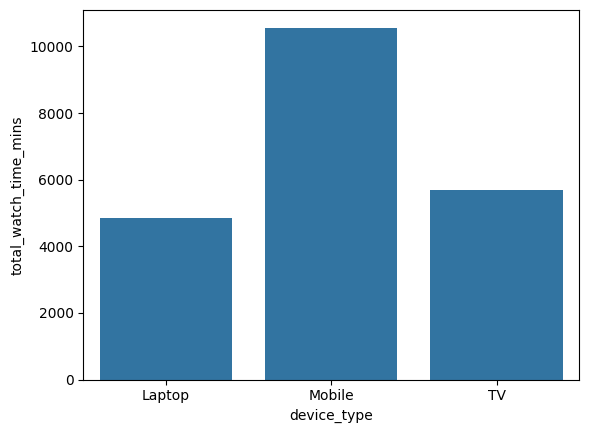

In [42]:
import seaborn as sns
sns.barplot(data=content_consuption_avg, x = 'device_type', y='total_watch_time_mins')

In [47]:
# Subscriber Insights: Analyse trends in subscriber acquisition and demographic variations.

df_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44620 entries, 0 to 44619
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                44620 non-null  object        
 1   age_group              44620 non-null  object        
 2   city_tier              44620 non-null  object        
 3   subscription_date      44620 non-null  datetime64[ns]
 4   subscription_plan      44620 non-null  object        
 5   last_active_date       6652 non-null   datetime64[ns]
 6   plan_change_date       7090 non-null   datetime64[ns]
 7   new_subscription_plan  7090 non-null   object        
dtypes: datetime64[ns](3), object(5)
memory usage: 3.1+ MB


In [46]:
df_subscribers['subscription_date'] = pd.to_datetime(df_subscribers['subscription_date'])
df_subscribers['last_active_date'] = pd.to_datetime(df_subscribers['last_active_date'])
df_subscribers['plan_change_date'] = pd.to_datetime(df_subscribers['plan_change_date'])

In [48]:
df_subscribers.shape

(44620, 8)

In [49]:
# Fetching the missing values count in dataframe
df_subscribers.isnull().sum()

user_id                      0
age_group                    0
city_tier                    0
subscription_date            0
subscription_plan            0
last_active_date         37968
plan_change_date         37530
new_subscription_plan    37530
dtype: int64

In [50]:
# split data into numberical and categorise
df_content

,content_id,content_type,language,genre,runtime
0,CJSMBEACT2e633,Movie,Bengali,Action,90
1,CJSMBEACT34aec,Movie,Bengali,Action,135
2,CJSMBEACT83b46,Movie,Bengali,Action,120
3,CJSMBECOM12e7a,Movie,Bengali,Comedy,120
4,CJSMBECOM5431a,Movie,Bengali,Comedy,135
...,...,...,...,...,...
2355,CJSSTETHR767c0,Series,Telugu,Thriller,20
2356,CJSSTETHR8b80e,Series,Telugu,Thriller,30
2357,CJSSTETHR92817,Series,Telugu,Thriller,45
2358,CJSSTETHRccd4d,Series,Telugu,Thriller,30


In [51]:
content_numerical_df = df_content.select_dtypes(include='int')
content_categorical_df = df_content.select_dtypes(include='O')

In [52]:
content_numerical_df

,runtime
0,90
1,135
2,120
3,120
4,135
...,...
2355,20
2356,30
2357,45
2358,30


In [53]:
content_categorical_df

,content_id,content_type,language,genre
0,CJSMBEACT2e633,Movie,Bengali,Action
1,CJSMBEACT34aec,Movie,Bengali,Action
2,CJSMBEACT83b46,Movie,Bengali,Action
3,CJSMBECOM12e7a,Movie,Bengali,Comedy
4,CJSMBECOM5431a,Movie,Bengali,Comedy
...,...,...,...,...
2355,CJSSTETHR767c0,Series,Telugu,Thriller
2356,CJSSTETHR8b80e,Series,Telugu,Thriller
2357,CJSSTETHR92817,Series,Telugu,Thriller
2358,CJSSTETHRccd4d,Series,Telugu,Thriller


In [56]:
# missing value treatment
content_numerical_df.describe()  # run time

,runtime
count,2360.000000
mean,89.550847
std,52.637611
min,5.000000
25%,30.000000
50%,90.000000
75%,120.000000
max,300.000000


<Axes: xlabel='runtime'>

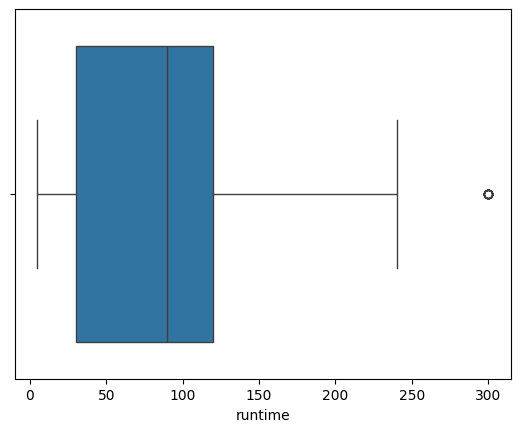

In [ ]:
sns.boxplot(content_numerical_df['runtime'],orient='h')  # grapth for content run time

<Axes: xlabel='runtime', ylabel='Count'>

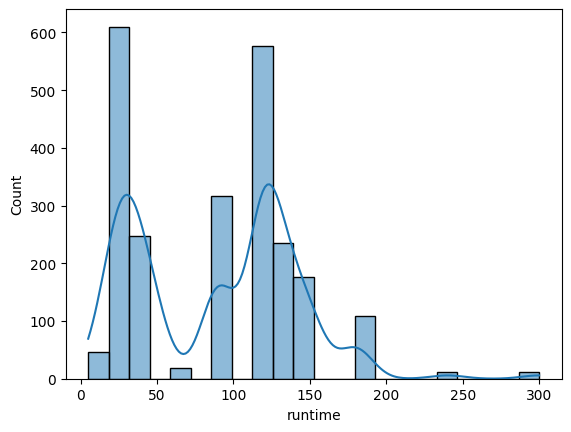

In [58]:

## univariate analysis
sns.histplot(content_numerical_df['runtime'], kde=True)

In [55]:
content_categorical_df.describe()

,content_id,content_type,language,genre
count,2360,2360,2360,2360
unique,2360,3,10,12
top,CJSMBEACT2e633,Movie,English,Action
freq,1,1180,800,398


<Axes: xlabel='count', ylabel='content_type'>

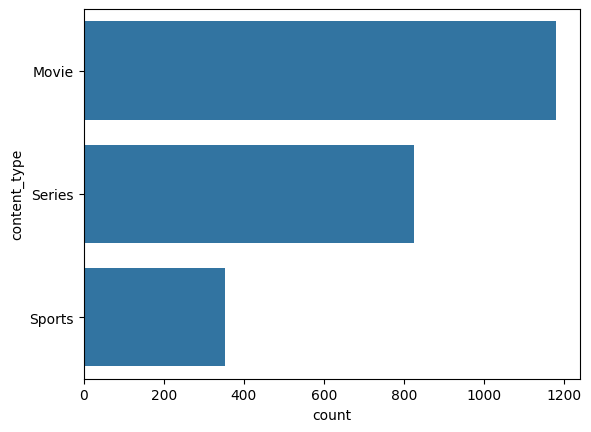

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_content = pd.read_csv(r"C:\Users\Prakruthi\OneDrive\Desktop\Python\jio_data_analytics_project\raw_data\content.csv", index_col="Unnamed: 0")
content_categorical_df = df_content.select_dtypes(include='O')
sns.countplot(content_categorical_df['content_type'])

<Axes: xlabel='count', ylabel='language'>

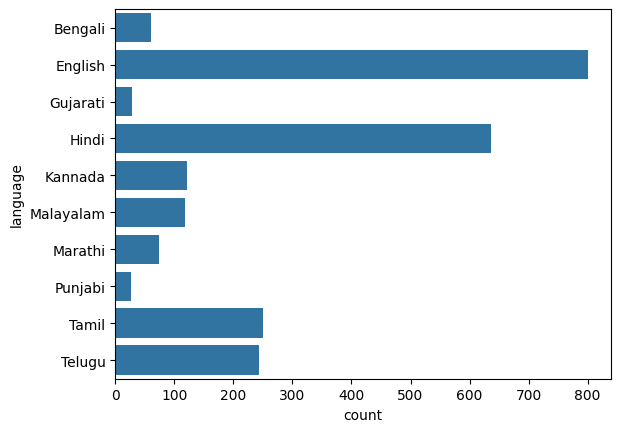

In [10]:
sns.countplot(content_categorical_df['language'])

<Axes: xlabel='count', ylabel='language'>

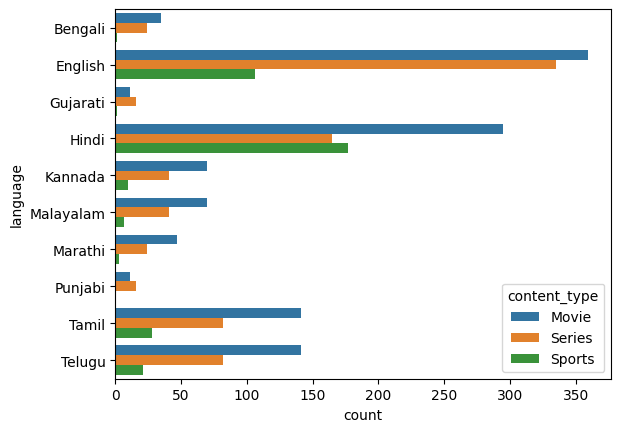

In [11]:
# Bivariate analysis

sns.countplot(data= content_categorical_df, y="language" , hue='content_type')



In [ ]:
### Subscriber Insights: Analyse trends in subscriber acquisition and demographic variations. 

In [14]:
df_subscribers.head()

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaN,NaN,NaN
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaN,NaN,NaN
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaN,NaN,NaN
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaN,NaN,NaN
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaN,NaN,NaN


In [16]:
# Fetching subscription_plan count in age_group category

sub_plan_vs_age = df_subscribers.groupby('age_group').value_counts(['subscription_plan']).to_frame().reset_index()
sub_plan_vs_age

,age_group,subscription_plan,count
0,18-24,VIP,3252
1,18-24,Premium,2305
2,18-24,Free,2119
3,25-34,VIP,8673
4,25-34,Premium,5938
5,25-34,Free,5458
6,35-44,VIP,4846
7,35-44,Premium,3417
8,35-44,Free,3011
9,45+,VIP,2386


<Axes: xlabel='age_group', ylabel='count'>

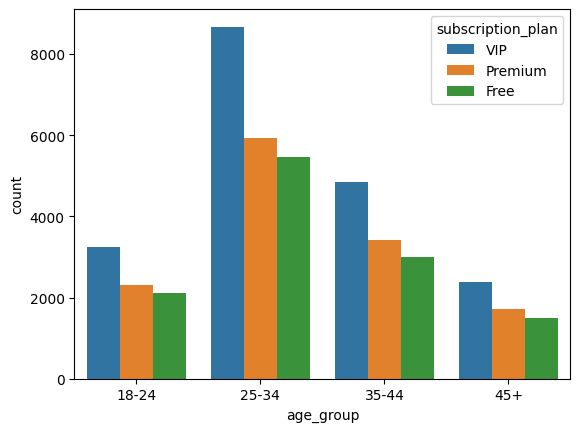

In [17]:
sns.barplot(data = sub_plan_vs_age, x = 'age_group',y='count',hue = 'subscription_plan')

In [18]:
# Fetching subscribers count on daily basis
subscription_data = df_subscribers.groupby(['subscription_date'])['user_id'].count().to_frame().reset_index()
subscription_data

,subscription_date,user_id
0,2024-01-01,116
1,2024-01-02,137
2,2024-01-03,133
3,2024-01-04,135
4,2024-01-05,126
...,...,...
330,2024-11-26,145
331,2024-11-27,134
332,2024-11-28,138
333,2024-11-29,156


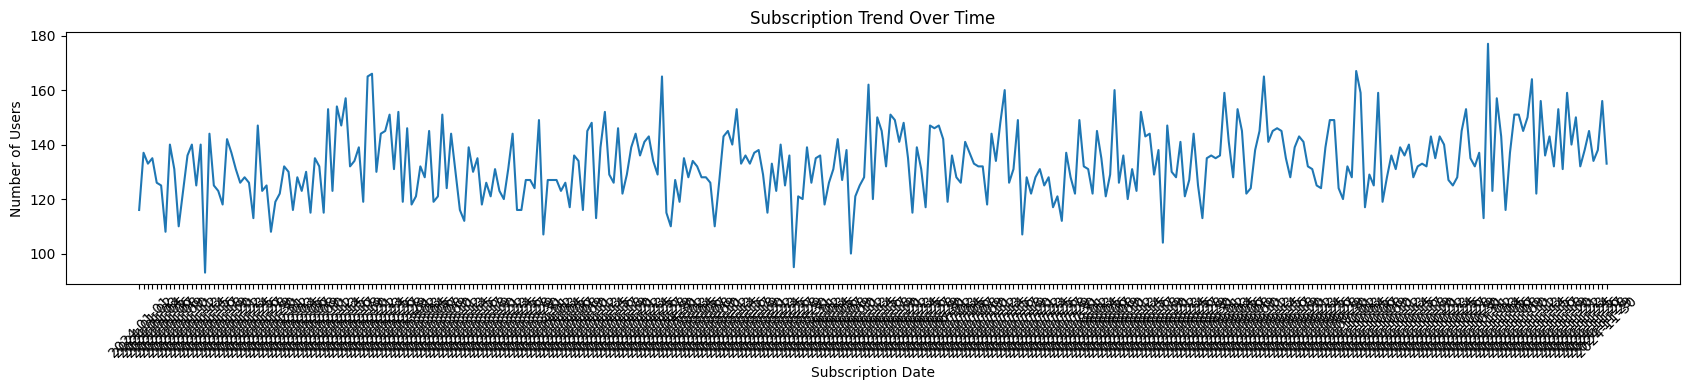

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(17, 4)) 
sns.lineplot(data=subscription_data, x='subscription_date', y ='user_id', markers='*')
plt.title("Subscription Trend Over Time")
plt.xlabel("Subscription Date")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
plan_changed_cus = df_subscribers[['user_id','plan_change_date','subscription_plan','new_subscription_plan']].dropna()
# subscribers_df[['user_id','plan_change_date','subscription_plan','new_subscription_plan']]

In [21]:
plan_changed_cus.head(10)

,user_id,plan_change_date,subscription_plan,new_subscription_plan
12,UIDJS000cd6a7fe8,2024-12-18,Premium,VIP
19,UIDJS0019b04b32f,2024-08-11,VIP,Free
23,UIDJS001defd7e03,2024-08-18,VIP,Free
47,UIDJS003cb5a2cd7,2024-10-05,VIP,Free
58,UIDJS004c0eb4154,2024-09-26,VIP,Free
59,UIDJS004d1ca89e3,2024-08-31,VIP,Free
74,UIDJS005f238dbb0,2024-08-03,Premium,Free
76,UIDJS006315e24bf,2024-03-04,Free,Premium
77,UIDJS0063b1fe9a3,2024-07-25,VIP,Free
81,UIDJS006711c9331,2024-06-22,Free,VIP


In [8]:
rank = {"Free": 1, "Premium": 2, "VIP": 3}

def cus_plan_change(old_plan, new_plan):

    if rank[new_plan] > rank[old_plan]:
        return "Upgrade"
    elif rank[new_plan] < rank[old_plan]:
        return "Downgrade"
    else:
        return "No Change"

plan_changed_cus['cus_plan_changed'] = plan_changed_cus.apply(lambda rows: cus_plan_change(rows['subscription_plan'], rows['new_subscription_plan']), axis=1)


In [9]:
plan_changed_cus['subscription_plan'].unique()

array(['Premium', 'VIP', 'Free'], dtype=object)

In [10]:
plan_changed_cus

,user_id,plan_change_date,subscription_plan,new_subscription_plan,cus_plan_changed
12,UIDJS000cd6a7fe8,2024-12-18,Premium,VIP,Upgrade
19,UIDJS0019b04b32f,2024-08-11,VIP,Free,Downgrade
23,UIDJS001defd7e03,2024-08-18,VIP,Free,Downgrade
47,UIDJS003cb5a2cd7,2024-10-05,VIP,Free,Downgrade
58,UIDJS004c0eb4154,2024-09-26,VIP,Free,Downgrade
...,...,...,...,...,...
44598,UIDJSffd997ae360,2024-08-28,VIP,Free,Downgrade
44600,UIDJSffdbd91a9cb,2024-08-11,VIP,Premium,Downgrade
44601,UIDJSffdd37f5584,2024-08-04,Premium,VIP,Upgrade
44602,UIDJSffe11ff87fb,2024-05-16,VIP,Free,Downgrade


In [11]:
plan_changed_cus_grp = plan_changed_cus.groupby('plan_change_date').value_counts(['cus_plan_changed']).to_frame().reset_index()

In [12]:
plan_changed_cus_grp.head()

,plan_change_date,cus_plan_changed,count
0,2024-02-01,Downgrade,7
1,2024-02-02,Downgrade,7
2,2024-02-02,Upgrade,3
3,2024-02-03,Upgrade,6
4,2024-02-03,Downgrade,5


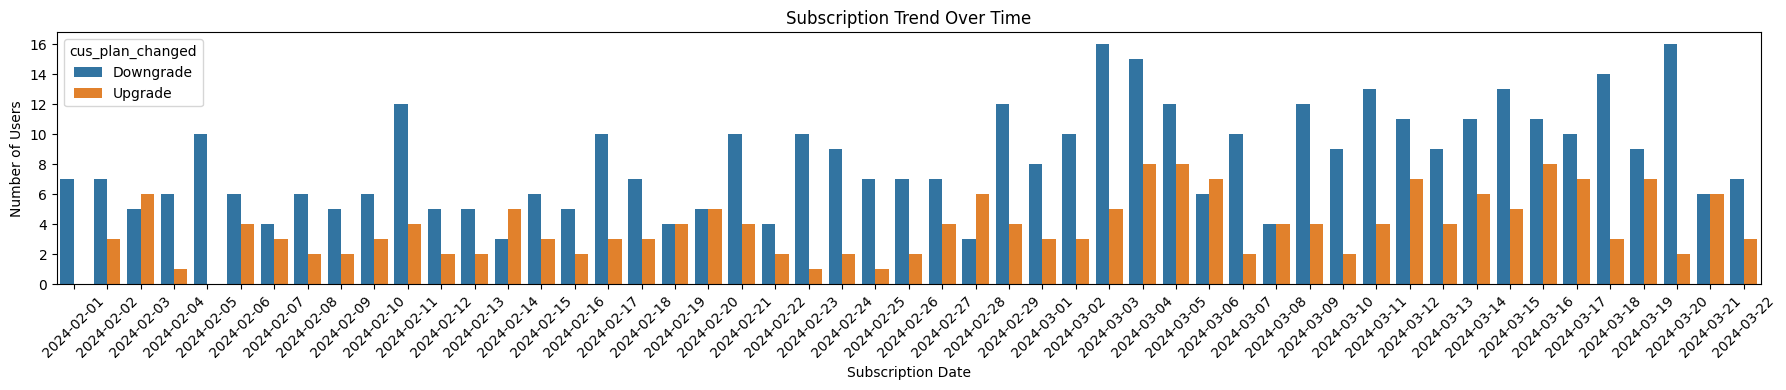

In [27]:

fig, ax = plt.subplots(figsize=(18, 4)) 
sns.barplot(data=plan_changed_cus_grp.head(100), x='plan_change_date', y='count', hue='cus_plan_changed')
plt.title("Subscription Trend Over Time")
plt.xlabel("Subscription Date")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
df_subscribers 

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaN,NaN,NaN
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaN,NaN,NaN
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaN,NaN,NaN
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaN,NaN,NaN
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
44615,UIDJSfffbb38249e,25-34,Tier 2,2024-11-12,Free,NaN,NaN,NaN
44616,UIDJSfffbd759005,45+,Tier 1,2024-05-21,VIP,NaN,NaN,NaN
44617,UIDJSfffebd3002b,25-34,Tier 1,2024-09-27,VIP,2024-10-29,NaN,NaN
44618,UIDJSffff6698084,35-44,Tier 3,2024-10-12,VIP,NaN,NaN,NaN


In [4]:
df_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44620 entries, 0 to 44619
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                44620 non-null  object
 1   age_group              44620 non-null  object
 2   city_tier              44620 non-null  object
 3   subscription_date      44620 non-null  object
 4   subscription_plan      44620 non-null  object
 5   last_active_date       6652 non-null   object
 6   plan_change_date       7090 non-null   object
 7   new_subscription_plan  7090 non-null   object
dtypes: object(8)
memory usage: 3.1+ MB


In [13]:
plan_changed_cus_mnt_df = plan_changed_cus_grp.groupby(['plan_change_date','cus_plan_changed'])['count'].sum().to_frame().reset_index()

In [21]:
# Instead of looking into day wise --> quarter wise or monthly wise

plan_changed_cus_grp['plan_change_date'] = pd.to_datetime(plan_changed_cus_grp['plan_change_date'], errors='coerce')

plan_changed_cus_grp['plan_change_month'] = plan_changed_cus_grp['plan_change_date'].dt.strftime("%Y-%m")


In [22]:
plan_changed_cus_mnt_df = plan_changed_cus_grp.groupby(['plan_change_month','cus_plan_changed'])['count'].sum().to_frame().reset_index()

In [23]:
plan_changed_cus_mnt_df

,plan_change_month,cus_plan_changed,count
0,2024-02,Downgrade,193
1,2024-02,Upgrade,83
2,2024-03,Downgrade,322
3,2024-03,Upgrade,149
4,2024-04,Downgrade,380
5,2024-04,Upgrade,157
6,2024-05,Downgrade,416
7,2024-05,Upgrade,180
8,2024-06,Downgrade,437
9,2024-06,Upgrade,178


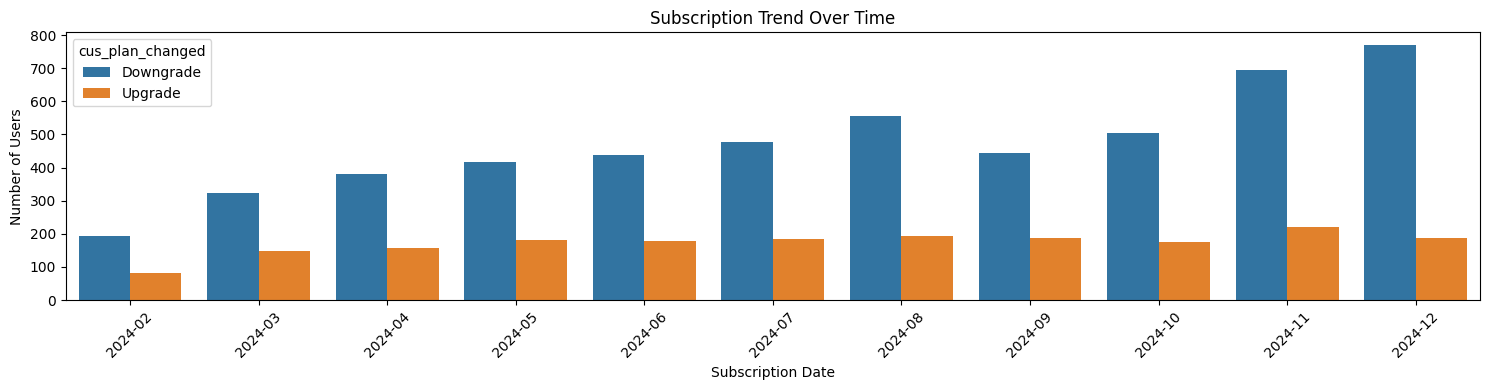

In [25]:
#
# Downgrade Patterns: Analysis of subscription downgrades and associated trends.
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 4)) 
sns.barplot(data=plan_changed_cus_mnt_df, x='plan_change_month', y='count', hue='cus_plan_changed')
plt.title("Subscription Trend Over Time")
plt.xlabel("Subscription Date")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# ## Inactivity Analysis: Patterns of inactivity across age groups, city tiers, and subscription plans.

df_subscribers.head()

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaN,NaN,NaN
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaN,NaN,NaN
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaN,NaN,NaN
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaN,NaN,NaN
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaN,NaN,NaN


In [27]:
df_subscribers['customer_activity'] = df_subscribers['last_active_date'].fillna("inactive")

In [30]:
df_subscribers['last_active_date'] = pd.to_datetime(df_subscribers['last_active_date'], errors='coerce') # this fix NaN to NaT(not a time)

df_subscribers['last_active_date'].value_counts()
df_subscribers['last_active_date'].max()

Timestamp('2024-12-29 00:00:00')

In [31]:
threshold_date = df_subscribers['last_active_date'].max() - pd.Timedelta(days=60)
threshold_date

Timestamp('2024-10-30 00:00:00')

In [32]:
# checking wheather the customer is inactive from past 60 days.

df_subscribers["is_inactive"] = df_subscribers["last_active_date"].isna() | (df_subscribers["last_active_date"] < threshold_date)

In [33]:
df_subscribers

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan,customer_activity,is_inactive
0,UIDJS0000751588f,18-24,Tier 1,2024-06-10,Premium,NaT,NaN,NaN,inactive,True
1,UIDJS000093eeb86,18-24,Tier 1,2024-11-09,Free,NaT,NaN,NaN,inactive,True
2,UIDJS00010d7fa1e,25-34,Tier 1,2024-08-08,Free,NaT,NaN,NaN,inactive,True
3,UIDJS00013411a85,35-44,Tier 2,2024-05-31,VIP,NaT,NaN,NaN,inactive,True
4,UIDJS0003a3f54cf,35-44,Tier 1,2024-09-20,Premium,NaT,NaN,NaN,inactive,True
...,...,...,...,...,...,...,...,...,...,...
44615,UIDJSfffbb38249e,25-34,Tier 2,2024-11-12,Free,NaT,NaN,NaN,inactive,True
44616,UIDJSfffbd759005,45+,Tier 1,2024-05-21,VIP,NaT,NaN,NaN,inactive,True
44617,UIDJSfffebd3002b,25-34,Tier 1,2024-09-27,VIP,2024-10-29,NaN,NaN,2024-10-29,True
44618,UIDJSffff6698084,35-44,Tier 3,2024-10-12,VIP,NaT,NaN,NaN,inactive,True


In [34]:
df_subscribers[df_subscribers['is_inactive']][['age_group','is_inactive']].value_counts()

age_group  is_inactive
25-34      True           18928
35-44      True           10707
18-24      True            7208
45+        True            5313
Name: count, dtype: int64

<Axes: ylabel='age_group,is_inactive'>

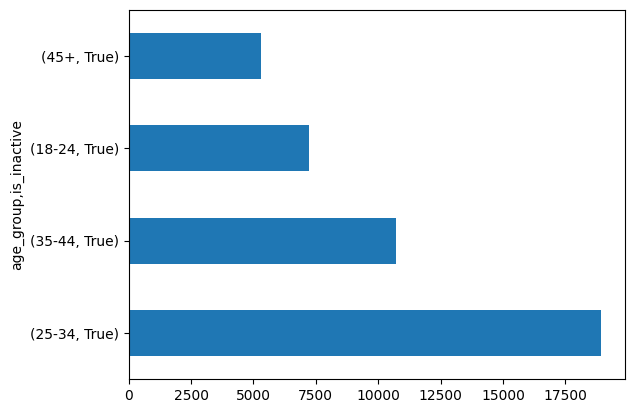

In [35]:
df_subscribers[df_subscribers['is_inactive'] == True][['age_group','is_inactive']].value_counts().plot(kind='barh')

<Axes: ylabel='age_group,city_tier'>

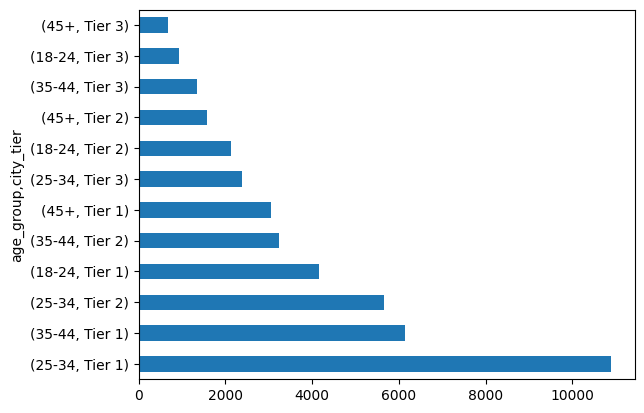

In [36]:
df_subscribers[df_subscribers['is_inactive'] == True][['age_group','city_tier']].value_counts().plot(kind='barh')

<Axes: xlabel='age_group', ylabel='count'>

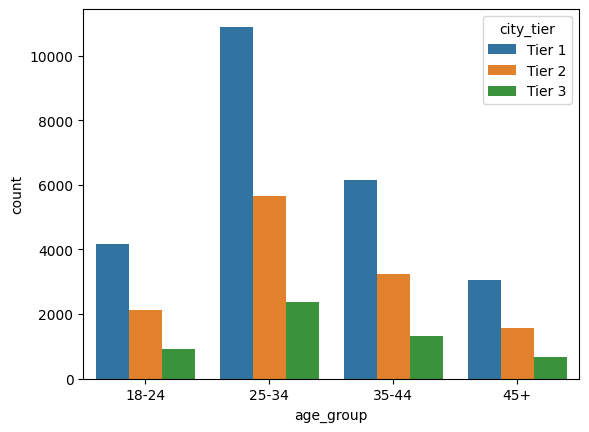

In [37]:
sns.countplot(data=df_subscribers[df_subscribers['is_inactive'] == True] , x='age_group', hue= 'city_tier' )

<Axes: xlabel='subscription_plan'>

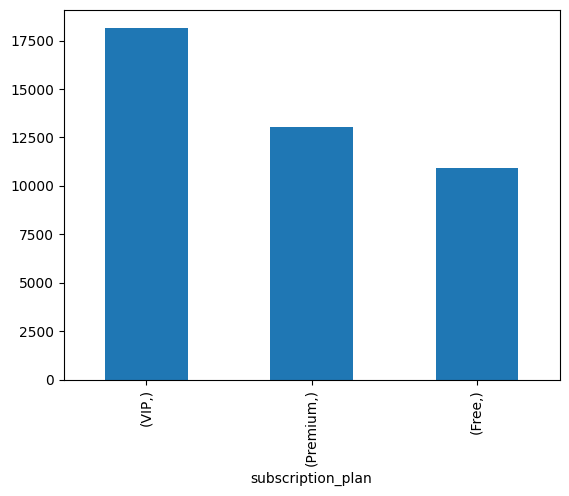

In [38]:
df_subscribers[df_subscribers['is_inactive'] == True][['subscription_plan']].value_counts().plot(kind='bar')

In [ ]:
### Assignment :
1) Content Consumption Behavior: Patterns in total watch time, device preferences, and variations by user demographics.
2) what cause downgrade
    -Hint: combine content_consumption_df and subscribers_df
